In [19]:
from ngclearn.utils import io_utils as io
from ngclearn.engine.ngc_graph import NGCGraph

model : NGCGraph

In [20]:
model : NGCGraph
model = io.deserialize('saved_models/mm9460.ngc')

print(model.nodes.keys())
print(model.theta)
print(model.K)
K = model.K
lat_lat_pos = model.cables["lat-to-lat_pos_mu_dense"]
lat_pos_pos = model.cables["lat_pos-to-pos_mu_dense"]

lat_lat_col = model.cables["lat-to-lat_col_mu_dense"]
lat_col_col = model.cables["lat_col-to-col_mu_dense"]







dict_keys(['lat', 'lat_col', 'lat_pos', 'col', 'pos', 'lat_col_mu', 'lat_pos_mu', 'col_mu', 'pos_mu', 'lc_e', 'lp_e', 'col_e', 'pos_e'])
[<tf.Variable 'A_lat-to-lat_col_mu_dense:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.59244823, -0.93849254, -0.81877387],
       [ 0.5505989 , -1.0258799 , -1.0203819 ],
       [-1.2635316 ,  0.7516728 ,  0.56190306]], dtype=float32)>, <tf.Variable 'A_lat-to-lat_pos_mu_dense:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.6962054 ,  0.29405883,  0.5097469 ],
       [ 0.58445066,  0.17309879,  0.36107063],
       [-0.25348368, -0.25585568, -0.23181044]], dtype=float32)>, <tf.Variable 'A_lat_col-to-col_mu_dense:0' shape=(3, 3) dtype=float32, numpy=
array([[-1.1264019 , -1.0324414 ,  0.62309515],
       [-0.02759993,  0.73863614,  1.0992988 ],
       [ 0.6662882 , -0.13038127,  1.0616395 ]], dtype=float32)>, <tf.Variable 'A_lat_pos-to-pos_mu_dense:0' shape=(3, 2) dtype=float32, numpy=
array([[-1.5424036 ,  0.03229947],
       [ 0.24355772, -1.38408

In [24]:
from utils.construction_utils import SNodeBuilder, CableConnector
from ngclearn.engine.nodes.enode import ENode
_bd = SNodeBuilder()
latent_dim = 3
col_dim = 3
pos_dim = 2

# col = _bd.O0_build("col", dim=col_dim)
# col_e = ENode("col_e", dim=col_dim)
col_F = _bd.O1_set_numerals(zeta=0.0, beta=1.0).O0_build("col_F", dim=col_dim)
# lat_col = _bd.O0_build("lat_col", dim=latent_dim)
# lat_col_e = ENode("lc_e", dim=latent_dim)
lat_col_F = _bd.O1_set_numerals(zeta=0.0, beta=1.0).O0_build("lat_col_F", dim=latent_dim)

latent_vec = _bd.O0_build("lat", dim=latent_dim)

lat_pos_mu = _bd.O0_build("lat_pos_mu", dim=latent_dim)
lat_pos_e = ENode("lp_e", dim=latent_dim)
lat_pos = _bd.O0_build("lat_pos", dim=latent_dim)

pos_mu = _bd.O0_build("pos_mu", dim=pos_dim)
pos_e = ENode("pos_e", dim=pos_dim)
pos = _bd.O0_build("pos", dim=pos_dim)

cc = CableConnector()

lv_lpmu = cc.O1_mirror(lat_lat_pos, mode=cc.Param.A).O0_connect(latent_vec, lat_pos_mu)
cc.O1_simple().O0_connect(lat_pos_mu, lat_pos_e, to_comp=cc.EComps.PMU)
cc.O1_simple().O0_connect(lat_pos, lat_pos_e, to_comp=cc.EComps.PTARG)
lpe_lv = cc.O1_mirror(lat_lat_pos, mode=cc.Param.AT).O0_connect(lat_pos_e, latent_vec)

lp_pmu = cc.O1_mirror(lat_pos_pos, mode=cc.Param.A).O0_connect(lat_pos, pos_mu)
cc.O1_simple().O0_connect(pos_mu, pos_e, to_comp=cc.EComps.PMU)
cc.O1_simple().O0_connect(pos, pos_e, to_comp=cc.EComps.PTARG)
pe_lp = cc.O1_mirror(lat_pos_pos, mode=cc.Param.AT).O0_connect(pos_e, lat_pos)

# ----

lv_lcmu = cc.O1_mirror(lat_lat_col, mode=cc.Param.A).O0_connect(latent_vec, lat_col_F)
# lcmu_lce = cc.O1_simple().O0_connect(lat_col_mu, lat_col_e, to_comp=cc.EComps.PMU)
# lc_lce = cc.O1_simple().O0_connect(lat_col, lat_col_e, to_comp=cc.EComps.PTARG)
# lce_lv = cc.O1_mirror(lv_lcmu).O0_connect(lat_col_e, latent_vec)

lc_cmu = cc.O1_mirror(lat_col_col, mode=cc.Param.A).O0_connect(lat_col_F, col_F)
# cmu_ce = cc.O1_simple().O0_connect(col_mu, col_e, to_comp=cc.EComps.PMU)
# col_ce = cc.O1_simple().O0_connect(col, col_e, to_comp=cc.EComps.PTARG)
# ce_lc = cc.O1_mirror(lc_cmu).O0_connect(col_e, lat_col)

blinded_model = NGCGraph(K=K)
blinded_model.set_cycle([latent_vec, lat_pos, pos])
blinded_model.set_cycle([lat_pos_mu, pos_mu, lat_col_F, col_F])
blinded_model.set_cycle([lat_pos_e, pos_e])
info = blinded_model.compile(batch_size=1)

(10, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0.         0.         0.        ]
  [0.07890819 0.07812902 0.07724281]
  [0.15781638 0.15625803 0.15448563]
  [0.23672457 0.23438704 0.23172843]
  [0.31563276 0.31251606 0.30897126]
  [0.39454091 0.39064506 0.38621405]
  [0.47344914 0.46877408 0.46345687]
  [0.55235732 0.54690301 0.54069966]
  [0.63126552 0.62503213 0.61794251]
  [0.71017367 0.703161   0.6951853 ]]

 [[0.11000847 0.10804921 0.12721689]
  [0.18891667 0.18617822 0.20445971]
  [0.26782483 0.26430723 0.28170255]
  [0.34673303 0.34243625 0.35894531]
  [0.42564124 0.42056531 0.43618813]
  [0.50454944 0.4986943  0.51343101]
  [0.58345765 0.57682329 0.59067374]
  [0.66236579 0.65495235 0.66791654]
  [0.741274   0.73308134 0.74515951]
  [0.82018214 0.81121027 0.82240212]]

 [[0.22001694 0.21609841 0.25443378]
  [0.29892516 0.29422748 0.33167663]
  [0.37783334 0.37235644 0.40891942]
  [0.45674148 0.45048544 0.48616219]
  [0.53564966 0.52861446 0.5634051 ]
  [0.61455792 0.60674357 0.64064789]
  [0.69346607 0.68487251 0.7178906

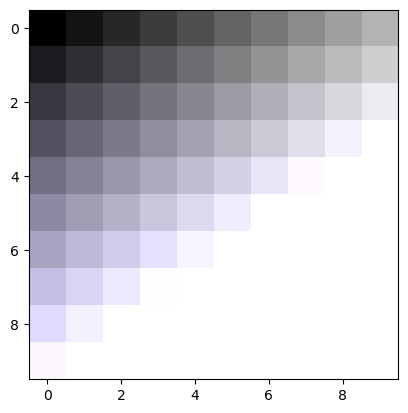

In [60]:
import numpy as np
import tensorflow as tf
dim = 100
pic = np.zeros((dim,dim,3))
print(pic[:,:,0].shape)
for iind, i in enumerate(np.linspace(0,1,dim)):
    for jind, j in enumerate(np.linspace(0,1,dim)):
        pos = np.array([[i, j]])
        pos = tf.cast(pos, dtype=tf.float32)
        rd, d = blinded_model.settle(
            clamped_vars=[("pos", "z", pos)],
            readout_vars=[("col_F", "phi(z)")]
        )
        # print(pic[int(i),int(j)])
        pic[iind,jind,:] = rd[0][2].numpy()[0]
        # print(rd[0,2,:].numpy()[0])
        blinded_model.clear()

import matplotlib.pyplot as plt
print(pic)
plt.imshow(pic)